In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
#load dataset

mnist = tf.keras.datasets.mnist
cifar10 = tf.keras.datasets.cifar10

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()


In [ ]:
# normalize pixel values to be between 0 and 1
x_train_mnist, x_test_mnist = x_train_mnist / 255, x_test_mnist / 255
x_train_cifar10, x_test_cifar10 = x_train_cifar10 / 255, x_test_cifar10 / 255

In [ ]:
mnist_input_shape = (28, 28, 1)
cifar_input_shape = (32, 32, 3)

In [ ]:
# function to create and compile CNN model with BN
def create_cnn(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

###CIFAR-10 with Horizontal and Vertical Flip Augmentation

In [ ]:
model_cifar10 = create_cnn(cifar_input_shape)

In [ ]:
# Train the model for cifar10
model_cifar10.fit(x_train_cifar10, y_train_cifar10, epochs=42, validation_data=(x_test_cifar10, y_test_cifar10))


Epoch 1/42
1563/1563 [==============================] - 21s 10ms/step - loss: 1.3019 - accuracy: 0.5381 - val_loss: 1.3035 - val_accuracy: 0.5600
Epoch 2/42
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9414 - accuracy: 0.6706 - val_loss: 0.9278 - val_accuracy: 0.6713
Epoch 3/42
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8061 - accuracy: 0.7193 - val_loss: 0.8613 - val_accuracy: 0.6984
Epoch 4/42
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7096 - accuracy: 0.7551 - val_loss: 0.9368 - val_accuracy: 0.6785
Epoch 5/42
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6351 - accuracy: 0.7799 - val_loss: 0.8372 - val_accuracy: 0.7147
Epoch 6/42
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5711 - accuracy: 0.8019 - val_loss: 1.0024 - val_accuracy: 0.6735
Epoch 7/42
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5191 - accuracy: 0.8184 - val_loss: 0.8520 - val_a

In [ ]:
# Load and preprocess the "dog" image
img_path = '/content/dog.png'
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [ ]:
# Predict the class probabilities for the original image
original_prediction = model_cifar10.predict(img_array)

1/1 [==============================] - 0s 170ms/step


In [ ]:
# Data augmentation: horizontal and vertical flips
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
augmented_images = datagen.flow(img_array)

In [ ]:
# Predict the class probabilities for the augmented image
flipped_prediction = model_cifar10.predict(augmented_images.next())

1/1 [==============================] - 0s 26ms/step


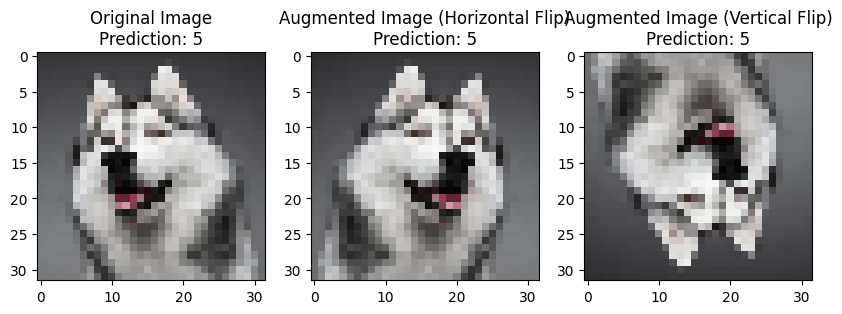

In [ ]:
# Display the original and augmented images
original_image = img_array[0]
flipped_image = augmented_images.next()[0]

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title(f'Original Image\nPrediction: {np.argmax(original_prediction)}')


plt.subplot(1, 3, 2)
plt.imshow(flipped_image)
plt.title(f'Augmented Image (Horizontal Flip)\nPrediction: {np.argmax(flipped_prediction)}')


plt.subplot(1, 3, 3)
plt.imshow(np.flipud(flipped_image))
plt.title(f'Augmented Image (Vertical Flip)\nPrediction: {np.argmax(flipped_prediction)}')

plt.show()

###MNIST with Rotation Augmentation

In [ ]:
model_mnist = create_cnn(mnist_input_shape)

In [ ]:
# Train the model for mnist
model_mnist.fit(np.expand_dims(x_train_mnist, axis=-1), y_train_mnist, epochs=5, validation_data=(np.expand_dims(x_test_mnist, axis=-1), y_test_mnist))

Epoch 1/5
1875/1875 [==============================] - 46s 7ms/step - loss: 0.1050 - accuracy: 0.9695 - val_loss: 0.0614 - val_accuracy: 0.9813
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0473 - val_accuracy: 0.9848
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0332 - accuracy: 0.9901 - val_loss: 0.0369 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0262 - val_accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0309 - val_accuracy: 0.9904


In [ ]:
# Load and preprocess the "handwritten6.jpg" image
img_path = '/content/handwritten6.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [ ]:
# Predict the class probabilities for the original image
original_prediction = model_mnist.predict(img_array)

1/1 [==============================] - 0s 109ms/step


In [ ]:
# Data augmentation: rotation
datagen = ImageDataGenerator(rotation_range=60)
augmented_images = datagen.flow(img_array)

In [ ]:
# Predict the class probabilities for the augmented image
rotated_prediction = model_mnist.predict(augmented_images.next())

1/1 [==============================] - 0s 18ms/step


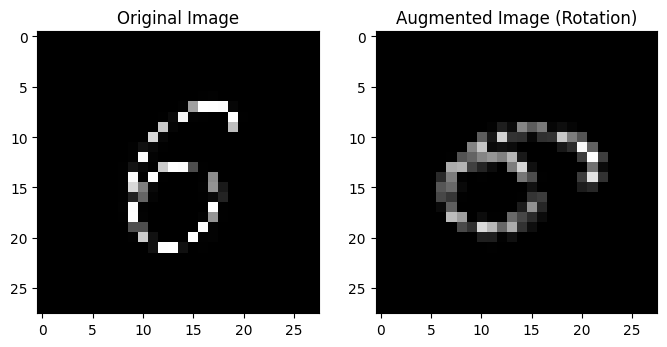

In [ ]:
# Display the original and augmented images
original_image = img_array[0, :, :, 0]
rotated_image = augmented_images.next()[0, :, :, 0]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title('Augmented Image (Rotation)')


plt.show()